# Declaration of Originality

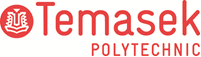

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Thiri War War Thein (2403216A)
* Tutorial Group                : P07
* Tutor						    : Ester Goh
* Submission Date               : 10.2.2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [795]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import joblib
import streamlit as st

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# 1. Business Understanding
Goal: Accurate estimation of abalone age is important for fisheries management and aquaculture planning. Traditionally, age is determined by counting growth rings on the shell which is a labor-intensive and invasive process. This creates a need for an alternative approach that is faster and less destructive.
The objective of this project is to develop a machine learning model that predicts abalone age based on physical measurements such as shell dimensions and weight components. The model estimates the number of rings which is then converted into an approximate age.
By providing an automated and data-driven method for age estimation, this approach supports more efficient monitoring of abalone populations and promotes sustainable resource management.

# 2. Data Understanding

## 2.1 Load dataset

In [796]:
## Read *.csv file into pandas DataFrame
FILE_PATH  = "abalone.data"
df = pd.read_csv(FILE_PATH)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## 2.2 Summary Statistics

In [797]:
## Understand the type of variable for each column
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


(4176, 9)

In [798]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [799]:
## Describe data distribution
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [800]:
df["Rings"].describe()

count    4176.000000
mean        9.932471
std         3.223601
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

The dataset contains 4,176 records with 9 columns. All columns have 4176 non-null values so there are no missing values. Most variables are numeric (7 float features) and the target variable Rings is an integer. The only categorical feature is Sex which has 3 categories (M, F and I).

The numeric columns have many unique values (eg, Whole weight: 2429 unique values, Shucked weight: 1515) which suggests the measurements are recorded with fine precision and provide good variability for model learning. Rings has 28 unique values (from 1 to 29) meaning the target is discrete but with a reasonable range.

Most abalones in the dataset are clustered around 9–11 rings which means the dataset is centered on “middle-aged” abalones rather than extremely young or very old ones.

Some measurements suggest the presence of outliers or anomalies. For example, the height feature includes values of zero as well as unusually large maximum values compared to its mean which may reflect measurement errors or uncommon specimens. Similarly, weight variables span a wide range and are likely right-skewed. These characteristics indicate the need for careful data validation, potential feature engineering.

Rings ranges from 1 to 29 but the middle 50% is only 8 to 11. This suggests the dataset contains fewer samples at extreme ring counts. Practically, this can make the model less accurate for very young or very old abalones because it sees fewer examples of those cases during training.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

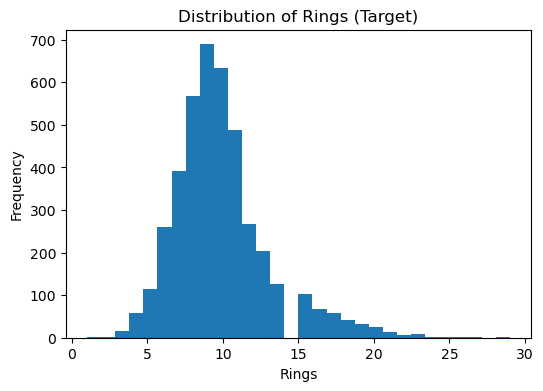

In [801]:
## Understanding distribution of target
plt.figure(figsize=(6,4))
plt.hist(df["Rings"], bins=30)
plt.xlabel("Rings")
plt.ylabel("Frequency")
plt.title("Distribution of Rings (Target)")
plt.show()

The distribution of the target variable, Rings, is unimodal and centered around values between 8 and 10 indicating that most abalones in the dataset are of moderate age. This is consistent with the median value of 9 and the mean of approximately 9.9. The concentration of observations in this range suggests that the dataset primarily represents mature but not old abalones which is typical in fisheries data where extreme ages are less commonly observed.

The histogram reveals a right-skewed distribution with a long tail extending toward higher ring counts. While the majority of samples fall below 15 rings, a smaller number of abalones have significantly higher ring values, reaching close to 30. This skewness reflects natural biological variability in abalone lifespan and growth rates rather than data quality issues. However, it also indicates that older abalones are underrepresented in the dataset.

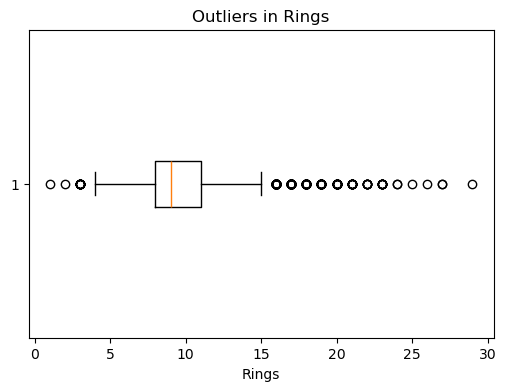

In [802]:
#Outlier detection for target variable
plt.figure(figsize=(6,4))
plt.boxplot(df["Rings"], vert=False)
plt.xlabel("Rings")
plt.title("Outliers in Rings")
plt.show()

The boxplot further confirms the presence of outliers particularly on the upper end of the distribution. These outliers represent very old abalones rather than erroneous data points and therefore should not be removed. Eliminating them would reduce the model’s ability to learn age-related patterns across the full lifespan of abalones. Instead, their presence justifies treating Rings as a continuous regression target and motivates the use of evaluation metrics that account for larger errors at extreme values.

Overall, the skewed distribution and presence of outliers suggest that the model may perform best for predicting middle-aged abalones and less accurately for very young or very old ones. This insight is important for interpreting prediction results and explains why some physically small abalones may still be predicted as adults based on learned patterns in the data.

### 2.3.1.2 Understanding distribution of features

In [803]:
df["Sex"].value_counts()

Sex
M    1527
I    1342
F    1307
Name: count, dtype: int64

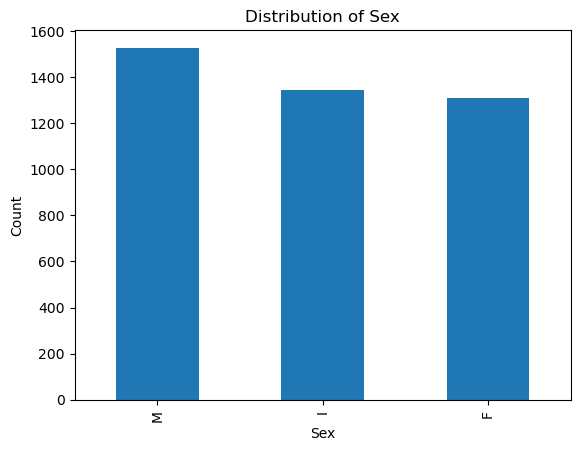

In [804]:
df["Sex"].value_counts().plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Sex")
plt.show()

he Sex variable contains three categories: Male (M), Female (F) and Infant (I). The distribution is relatively balanced with males being the most frequent (1,527 samples) followed by infants (1,342) and females (1,307). No category overwhelmingly dominates the dataset indicating the absence of significant class imbalance.

The inclusion of the Infant category is biologically meaningful, as it represents abalones that have not reached sexual maturity and may exhibit different growth patterns. From a modelling perspective, this supports retaining Sex as a three-category feature and encoding it appropriately. Overall, the balanced distribution suggests that Sex can contribute useful information to the model without introducing bias toward any single group.

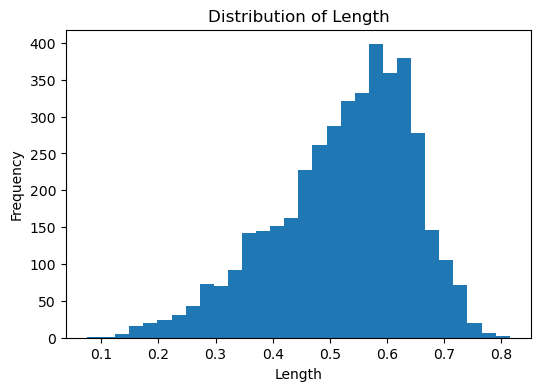

In [805]:
## Understanding distribution of features
plt.figure(figsize=(6,4))
plt.hist(df["Length"], bins=30)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Distribution of Length")
plt.show()


The distribution of Length is approximately bell-shaped with most values concentrated between 0.45 and 0.65. The peak occurs around 0.55 to 0.60 which is consistent with the mean and median values observed in the dataset. This indicates that the majority of abalones fall within a moderate size range while very small and very large specimens are less common.

The distribution shows slight right skewness with a gradual decline in frequency toward larger lengths. This reflects natural biological growth where fewer abalones reach very large sizes. Importantly, no extreme or isolated outliers are observed suggesting that the length measurements are consistent and reliable. From a modelling perspective, the smooth distribution and clear central tendency indicate that Length is a stable and informative feature for predicting abalone age.

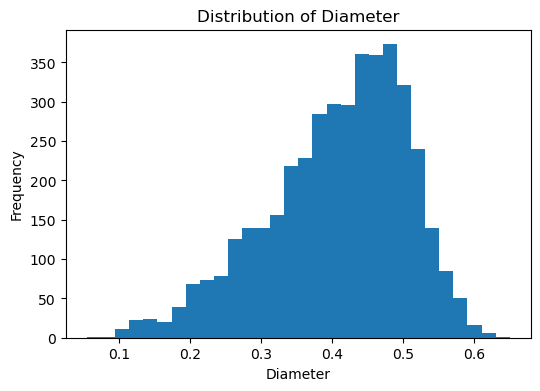

In [806]:
plt.figure(figsize=(6,4))
plt.hist(df["Diameter"], bins=30)
plt.xlabel("Diameter")
plt.ylabel("Frequency")
plt.title("Distribution of Diameter")
plt.show()

The distribution of Diameter is unimodal and approximately symmetric with most values concentrated between 0.35 and 0.50. The peak of the distribution occurs around 0.45 which aligns closely with the mean and median reported in the summary statistics. This indicates that the majority of abalones have similar shell widths reflecting a typical growth pattern within the population.

A slight right skew is observed with fewer abalones having very large diameters. This is expected biologically as shell growth slows as abalones mature. No extreme outliers are found suggesting that the diameter measurements are consistent and reliable. From a modelling perspective, Diameter is a stable feature that complements Length and contributes meaningful information for predicting abalone age.

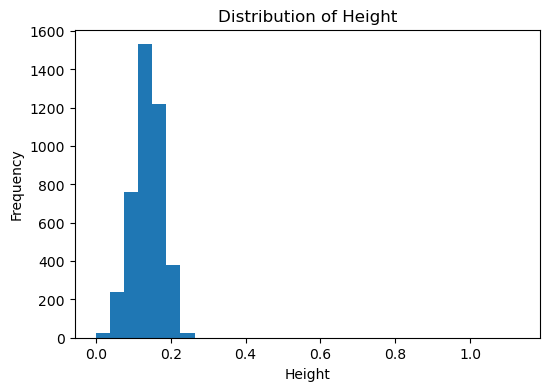

In [807]:
plt.figure(figsize=(6,4))
plt.hist(df["Height"], bins=30)
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.title("Distribution of Height")
plt.show()

The distribution of Height is strongly concentrated between approximately 0.10 and 0.20, with a clear peak around 0.14, indicating that most abalones have relatively similar shell thickness. Compared to length and diameter, height shows a narrower spread, suggesting less variation in vertical shell growth across the population.

The distribution is right-skewed with a small number of unusually large height values extending beyond the main cluster. These extreme values may represent rare specimens or potential measurement anomalies, as they are far from the typical range observed in the dataset. This characteristic highlights the importance of validation and careful handling of height values during modelling. 

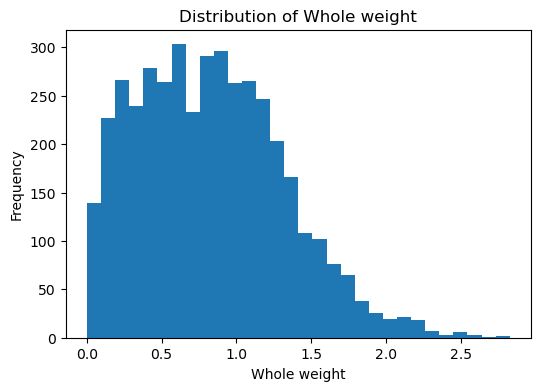

In [808]:
plt.figure(figsize=(6,4))
plt.hist(df["Whole weight"], bins=30)
plt.xlabel("Whole weight")
plt.ylabel("Frequency")
plt.title("Distribution of Whole weight")
plt.show()

The Height feature shows a concentrated distribution with most values falling between 0.10 and 0.20 and a peak around 0.14. This indicates that shell thickness varies less compared to length and diameter suggesting more consistent vertical growth among abalones. Such a pattern is biologically reasonable as height typically increases at a slower and more constrained rate.

The distribution is noticeably right-skewed with a small number of values extending far beyond the main cluster. These extreme values may correspond to rare specimens or potential measurement inconsistencies. Although they are infrequent they can influence model training if not carefully considered. Height remains an informative feature when used alongside other size and weight measurements to capture abalone growth characteristics.

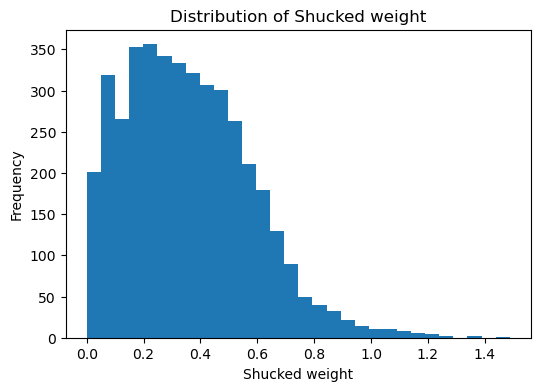

In [809]:
plt.figure(figsize=(6,4))
plt.hist(df["Shucked weight"], bins=30)
plt.xlabel("Shucked weight")
plt.ylabel("Frequency")
plt.title("Distribution of Shucked weight")
plt.show()

The distribution of Shucked weight is clearly right-skewed with most values concentrated between 0.15 and 0.50. This indicates that the majority of abalones have a moderate amount of edible meat while a smaller number exhibit significantly higher shucked weights. The long tail toward larger values reflects natural biological variation where only some abalones grow large enough to accumulate substantial meat mass.

The absence of isolated extreme points suggests that these higher values are valid observations rather than data errors. However, the skewed nature of the distribution implies that shucked weight may disproportionately influence model training if not carefully handled. From a modelling perspective, this feature is highly informative as meat weight is closely related to overall growth and age but it may benefit from normalization or ratio-based feature engineering to reduce the impact of extreme values.

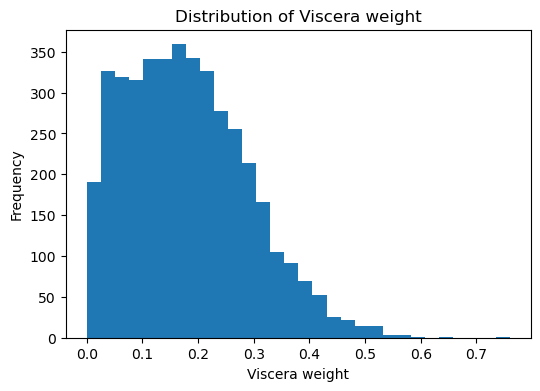

In [810]:
plt.figure(figsize=(6,4))
plt.hist(df["Viscera weight"], bins=30)
plt.xlabel("Viscera weight")
plt.ylabel("Frequency")
plt.title("Distribution of Viscera weight")
plt.show()

The distribution of Viscera weight is right-skewed with most values concentrated between 0.05 and 0.25. This indicates that the majority of abalones have relatively small visceral mass while a smaller number exhibit substantially higher viscera weights. The gradual decline in frequency toward larger values reflects natural biological variation rather than abrupt anomalies.

Although extreme values are present, they are limited in number and do not appear to be isolated errors. From a modelling perspective, the skewed distribution suggests that viscera weight may have a non-linear relationship with age and could disproportionately influence predictions if left unscaled. Nevertheless, this feature remains biologically relevant as viscera development is associated with growth and maturity making it a useful predictor when combined with other size and weight measurements.

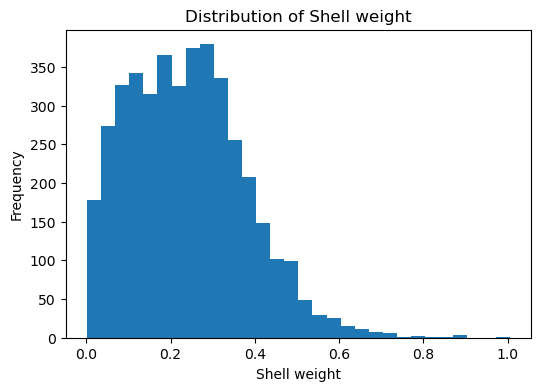

In [811]:
plt.figure(figsize=(6,4))
plt.hist(df["Shell weight"], bins=30)
plt.xlabel("Shell weight")
plt.ylabel("Frequency")
plt.title("Distribution of Shell weight")
plt.show()

The distribution of Shell weight is right-skewed with most values concentrated between 0.10 and 0.35. This indicates that the majority of abalones have moderately weighted shells while a smaller proportion exhibit substantially heavier shells. The long tail toward higher values reflects natural variation in shell thickness and density as abalones age.

Although a few high-value observations are present, they appear to be valid rather than anomalous. From a modelling perspective, shell weight is an important indicator of structural growth and maturity but its skewed distribution suggests that it may exert a strong influence on predictions. 

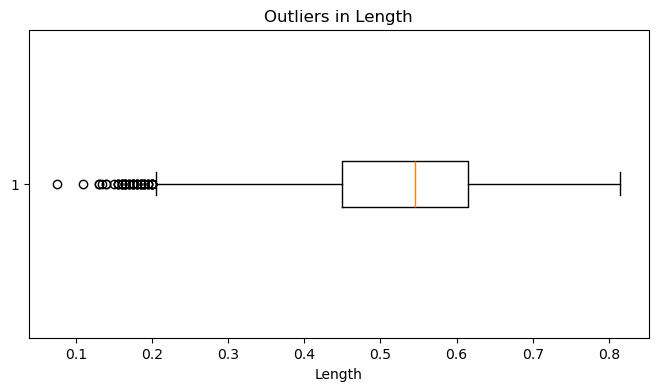

In [812]:
plt.figure(figsize=(8,4))
plt.boxplot(df["Length"], vert=False)
plt.xlabel("Length")
plt.title("Outliers in Length")
plt.show()

The boxplot for Length shows that most values are concentrated within a relatively narrow interquartile range with the median located around the centre of the box. This indicates that the majority of abalones have similar shell lengths reflecting a consistent growth pattern within the population. The whiskers extend smoothly on both sides suggesting a gradual spread of values rather than abrupt changes.

Several outliers are observed on the lower end of the distribution corresponding to very small shell lengths. These outliers likely represent young or juvenile abalones rather than measurement errors. 

From a modelling perspective, these outliers should not be removed as they provide important information about early growth stages and age variation. However, their presence reinforces the need for robust models and careful evaluation as extreme values can influence predictions. 

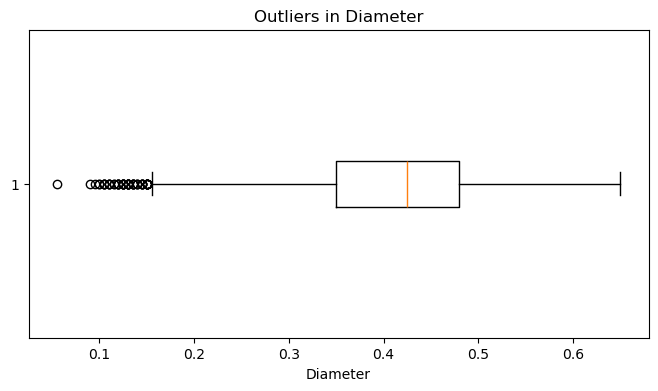

In [813]:
plt.figure(figsize=(8,4))
plt.boxplot(df["Diameter"], vert=False)
plt.xlabel("Diameter")
plt.title("Outliers in Diameter")
plt.show()

The boxplot for Diameter shows that most abalones have similar shell widths as the majority of values fall within a narrow range around the median. This suggests that diameter does not vary greatly for most abalones in the dataset and follows a consistent growth pattern.

A number of small outliers appear on the lower end which likely represent young abalones with smaller shells rather than incorrect data. There are very few extreme values on the higher end indicating that very large diameters are rare. Overall, the outliers reflect natural differences in growth stages and the diameter measurements appear reasonable and suitable for use in the model.

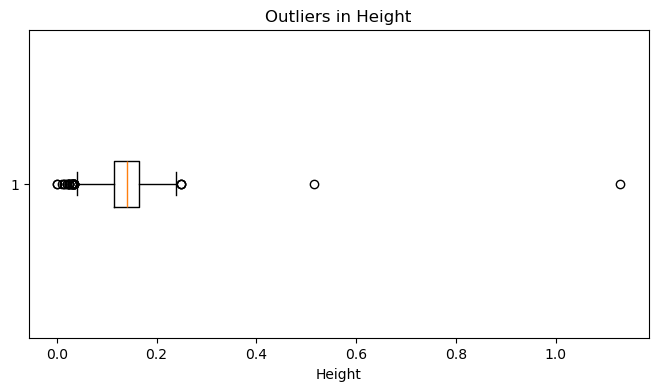

In [814]:
plt.figure(figsize=(8,4))
plt.boxplot(df["Height"], vert=False)
plt.xlabel("Height")
plt.title("Outliers in Height")
plt.show()

The boxplot for Height shows that most values are tightly grouped within a small range indicating that shell height is generally consistent across the dataset. The median lies near the centre of the box suggesting a stable typical height for most abalones.

Several outliers appear on both ends with a few extremely large values standing far from the main group. These extreme high values are unusual compared to the rest of the data and may represent rare specimens or possible measurement errors. Because height varies less than other dimensions, these outliers can have a stronger influence on the model. As a result, height should be carefully validated or handled using robust modelling techniques while still retaining biologically meaningful variation.

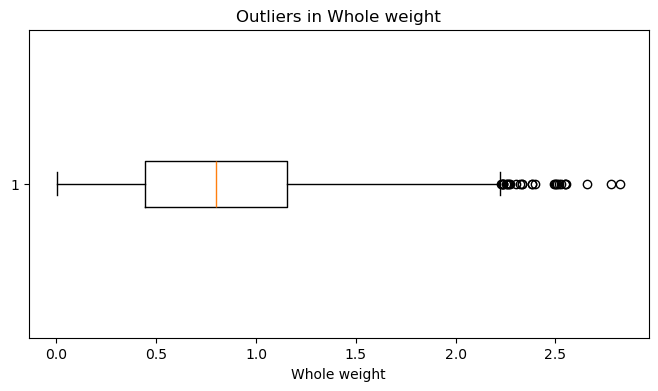

In [815]:
plt.figure(figsize=(8,4))
plt.boxplot(df["Whole weight"], vert=False)
plt.xlabel("Whole weight")
plt.title("Outliers in Whole weight")
plt.show()

The boxplot for Whole weight shows a wide spread of values indicating substantial variation in the overall mass of abalones. Most observations fall within the interquartile range around the median which suggests that typical abalones have moderate weights while lighter and heavier specimens are less common.

A number of outliers are visible on the higher end representing unusually heavy abalones. These values are expected in biological data as older and larger abalones naturally weigh more. There are few extreme low-end outliers indicating that very light abalones are less frequent. From a modelling perspective, these high-weight outliers should be retained because they carry meaningful information about mature abalones but their presence highlights the importance of using models and evaluation methods that are robust to extreme values.

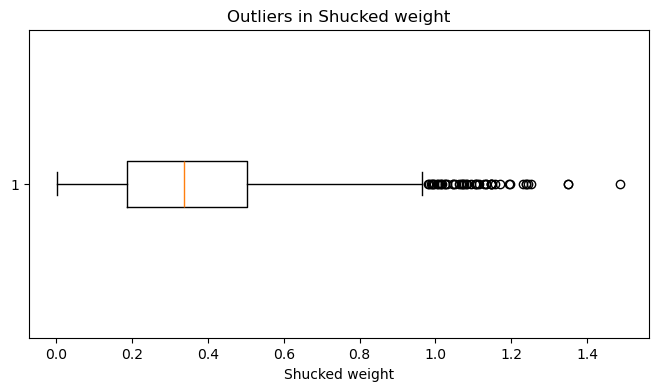

In [816]:
plt.figure(figsize=(8,4))
plt.boxplot(df["Shucked weight"], vert=False)
plt.xlabel("Shucked weight")
plt.title("Outliers in Shucked weight")
plt.show()

The boxplot for Shucked weight shows that most values are concentrated within a moderate range with the median located near the centre of the interquartile range. This indicates that the majority of abalones have a similar amount of edible meat.

Several outliers appear on the higher end representing abalones with unusually large meat weights. These are likely larger or more mature abalones rather than data errors. Very few low-end outliers are present suggesting that extremely low shucked weights are uncommon. From a modelling perspective, these high-value outliers are important for learning age-related patterns but may increase sensitivity to extreme values
 reinforcing the need for careful feature scaling or robust modelling approaches.

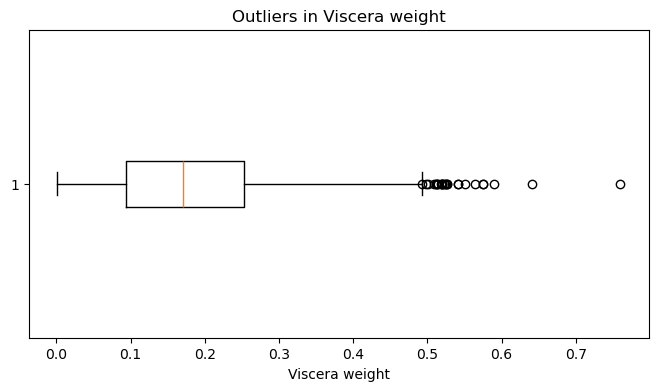

In [817]:
plt.figure(figsize=(8,4))
plt.boxplot(df["Viscera weight"], vert=False)
plt.xlabel("Viscera weight")
plt.title("Outliers in Viscera weight")
plt.show()

The boxplot for Viscera weight shows that most values fall within a relatively narrow range with the median located near the centre of the interquartile range. This suggests that visceral mass is fairly consistent for the majority of abalones.

Several high-end outliers are visible indicating abalones with unusually large visceral weights. These values are likely associated with larger or more mature individuals rather than measurement errors. Low-end outliers are minimal showing that extremely small viscera weights are uncommon. From a modelling perspective, these outliers contain meaningful biological information and should be retained but their presence suggests that robust models or appropriate scaling may be beneficial to reduce the influence of extreme values.

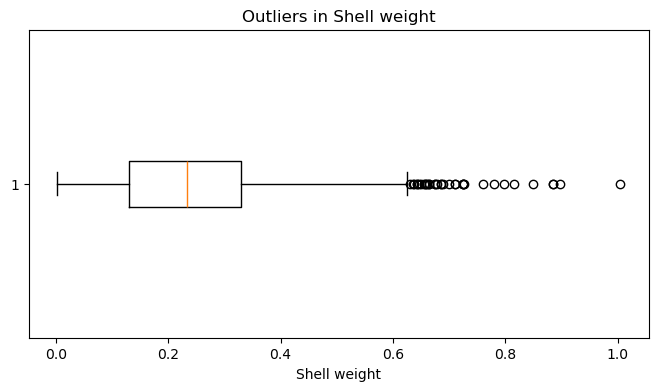

In [818]:
plt.figure(figsize=(8,4))
plt.boxplot(df["Shell weight"], vert=False)
plt.xlabel("Shell weight")
plt.title("Outliers in Shell weight")
plt.show()

The boxplot for Shell weight shows that most values are concentrated within a moderate range with the median near the centre of the interquartile range. This indicates that shell weight is relatively consistent for most abalones reflecting similar shell development across the population.

Several outliers appear on the higher end representing abalones with unusually heavy shells. These observations are biologically plausible as shell thickness and density tend to increase with age and growth. There are very few extreme low-end outliers suggesting that abnormally light shells are uncommon. From a modelling perspective, these high-value outliers should be retained because they carry important information about maturity but they also highlight the need for careful handling to prevent extreme values from disproportionately influencing predictions.

### 2.3.2 Understanding relationship between variables

In [819]:
df.drop("Sex",axis=1).corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


The correlation matrix shows strong relationships among the physical and weight-related features which is expected given that these measurements all describe different aspects of abalone size and growth. Length and diameter are almost perfectly correlated (0.99) indicating that abalones generally grow proportionally in these two dimensions. Similarly, the weight-related variables (whole, shucked, viscera and shell weight) are highly correlated with one another with coefficients above 0.88 reflecting that increases in overall size naturally lead to increases in all weight components.

When examining the relationship with the target variable Rings, all features show moderate positive correlations ranging approximately from 0.42 to 0.63. This suggests that abalone age increases with size and weight but not in a strictly linear or deterministic manner. Among all features, shell weight has the strongest correlation with Rings (0.63)implying that shell development is a particularly strong indicator of age. In contrast, shucked weight has the weakest correlation (0.42) suggesting that meat mass is more influenced by short-term biological or environmental factors than by age alone.

The presence of very high correlations among predictors also indicates potential multicollinearity especially between length, diameter, and the various weight measures. While this may affect simpler models such as linear regression, it is less problematic for tree-based or ensemble models.

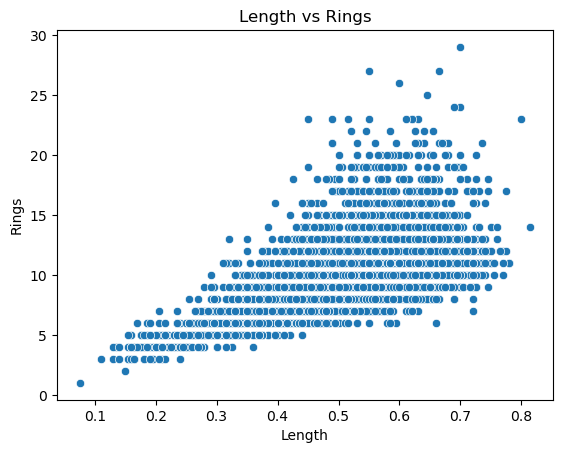

In [820]:
## Understanding relationship between variables
sns.scatterplot(x=df["Length"], y=df["Rings"])
plt.title("Length vs Rings")
plt.show()

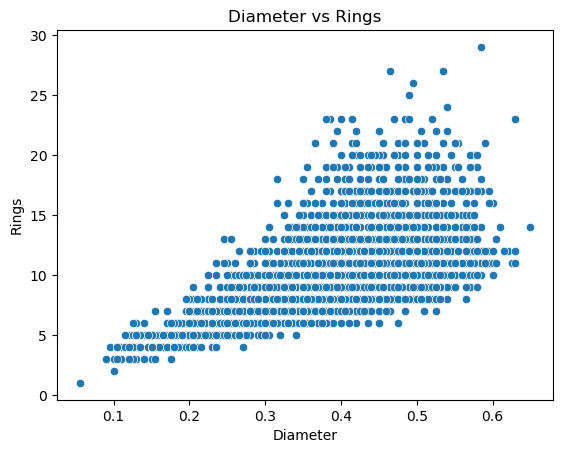

In [821]:
sns.scatterplot(x=df["Diameter"], y=df["Rings"])
plt.title("Diameter vs Rings")
plt.show()

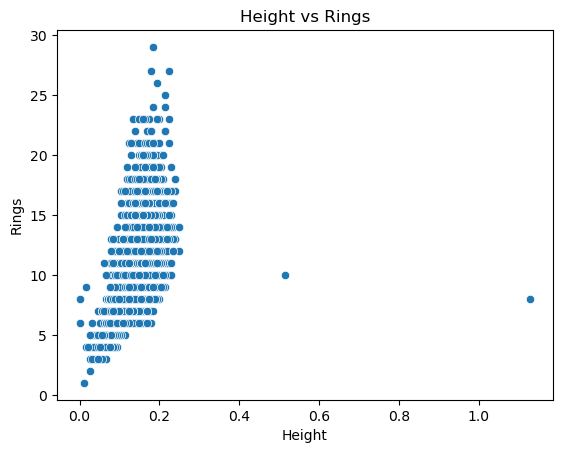

In [822]:
sns.scatterplot(x=df["Height"], y=df["Rings"])
plt.title("Height vs Rings")
plt.show()

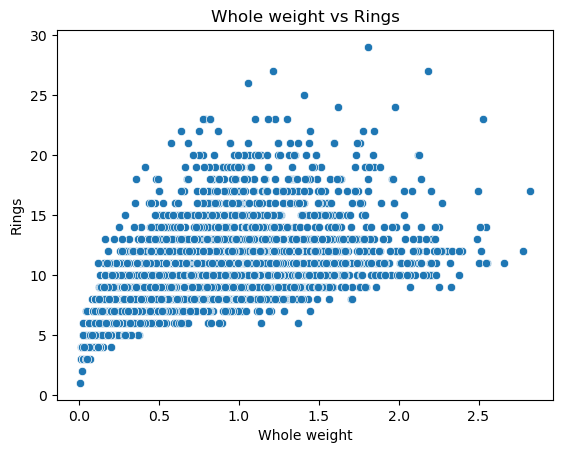

In [823]:
sns.scatterplot(x=df["Whole weight"], y=df["Rings"])
plt.title("Whole weight vs Rings")
plt.show()

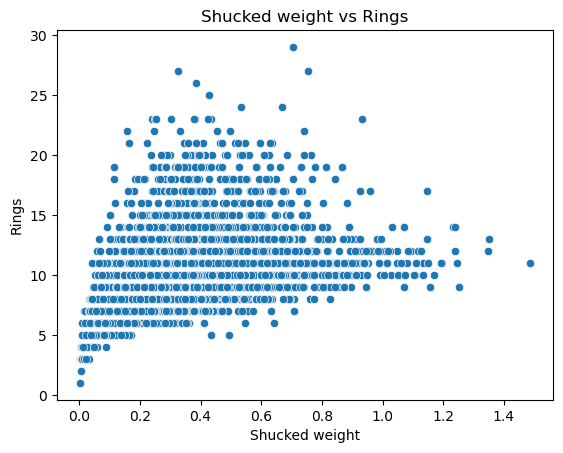

In [824]:
sns.scatterplot(x=df["Shucked weight"], y=df["Rings"])
plt.title("Shucked weight vs Rings")
plt.show()

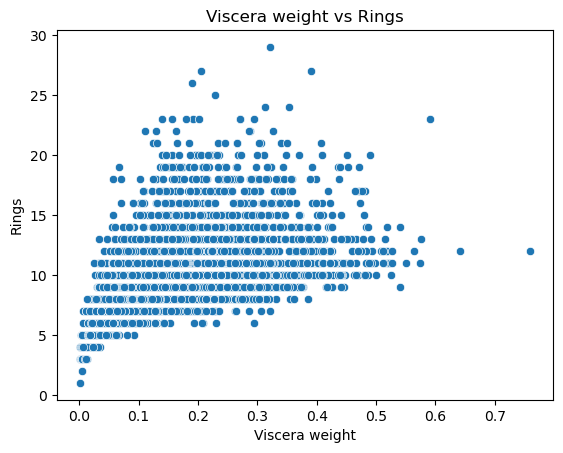

In [825]:
sns.scatterplot(x=df["Viscera weight"], y=df["Rings"])
plt.title("Viscera weight vs Rings")
plt.show()

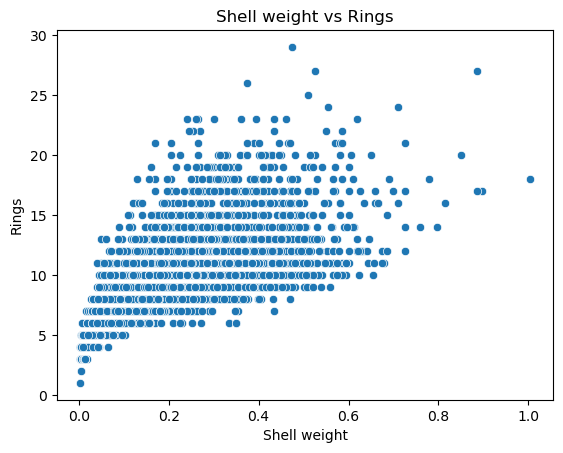

In [826]:
sns.scatterplot(x=df["Shell weight"], y=df["Rings"])
plt.title("Shell weight vs Rings")
plt.show()

Across all scatter plots, a clear positive relationship can be observed between the physical/weight features and the target variable Rings indicating that abalone age generally increases with size and mass. Length and Diameter show strong near-linear upward trends with Rings suggesting that horizontal shell growth is closely linked to age especially during early to mid-life stages. Height also increases with Rings but exhibits greater variability and a few extreme values implying that vertical shell growth is less consistent and may be influenced by biological or measurement factors. The weight-related features (Whole weight, Shucked weight, Viscera weight and Shell weight) all display positive but more dispersed relationships with Rings reflecting that while heavier abalones tend to be older, weight accumulation is affected by multiple factors such as nutrition and environment. Among these, Shell weight shows the clearest upward pattern reinforcing earlier correlation findings that shell development is a strong indicator of age. The widening spread of points at higher Ring values across all plots suggests increasing variability in growth among older abalones justifying the use of non-linear or ensemble models rather than relying on simple linear assumptions.

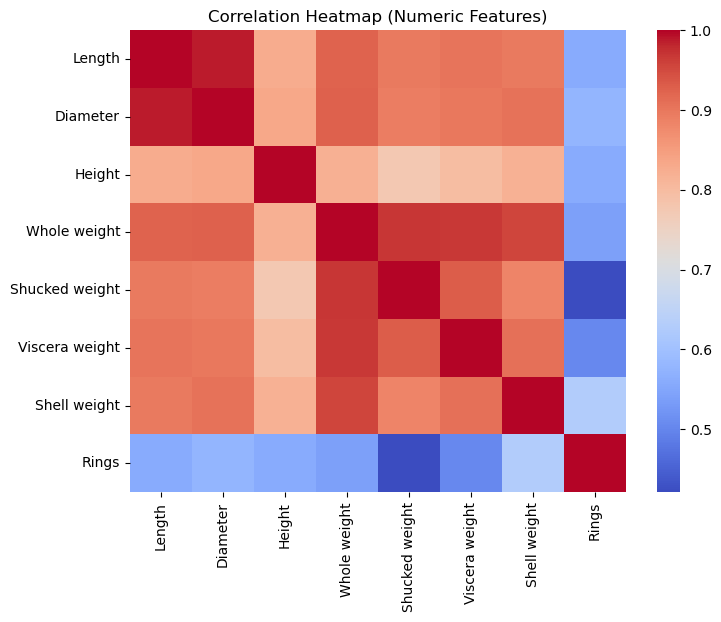

In [827]:
#Correlation heatmap
# Select numeric columns only
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

The correlation heatmap shows very strong relationships among the physical and weight-based features indicating that these variables jointly describe abalone size and growth. Length and diameter are almost perfectly correlated confirming that abalones grow proportionally in horizontal dimensions. Similarly, the weight-related features (whole, shucked, viscera and shell weight) exhibit high correlations with one another reflecting that increases in overall size naturally lead to increases in all weight components. In relation to the target variable Rings, all features demonstrate moderate positive correlations suggesting that age generally increases with size and mass but not in a strictly linear manner. Among the features, shell weight shows the strongest association with Rings which highlights shell development as a key indicator of age. In contrast, shucked weight has the weakest relationship implying that meat mass may be influenced by short-term biological or environmental factors rather than age alone. The high correlations among predictors also indicate the presence of multicollinearity which may affect simpler linear models by inflating feature importance. However, this is less problematic for tree-based or ensemble methods. Overall, the heatmap confirms that the selected numerical features are relevant for age prediction while justifying the need for robust modelling techniques or feature engineering to manage redundant information.

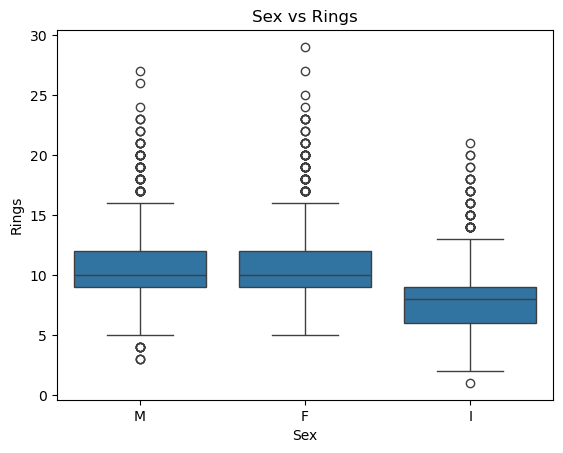

In [828]:
#Correlation
sns.boxplot(x="Sex", y="Rings", data=df)
plt.title("Sex vs Rings")
plt.show()


The boxplot comparing Sex and Rings shows clear differences in age distribution across the three categories. Male (M) and Female (F) abalones have similar median ring counts and both centered around approximately 10 which indicates comparable age distributions between mature sexes. In contrast, the Infant (I) group has a noticeably lower median reflecting that these abalones are generally younger and have fewer growth rings. The spread of values for males and females is wider with several high-end outliers which represent older abalones. This suggests greater age variability among mature individuals. The infant group shows a more compact distribution with fewer extreme values which is expected given their limited growth time. 

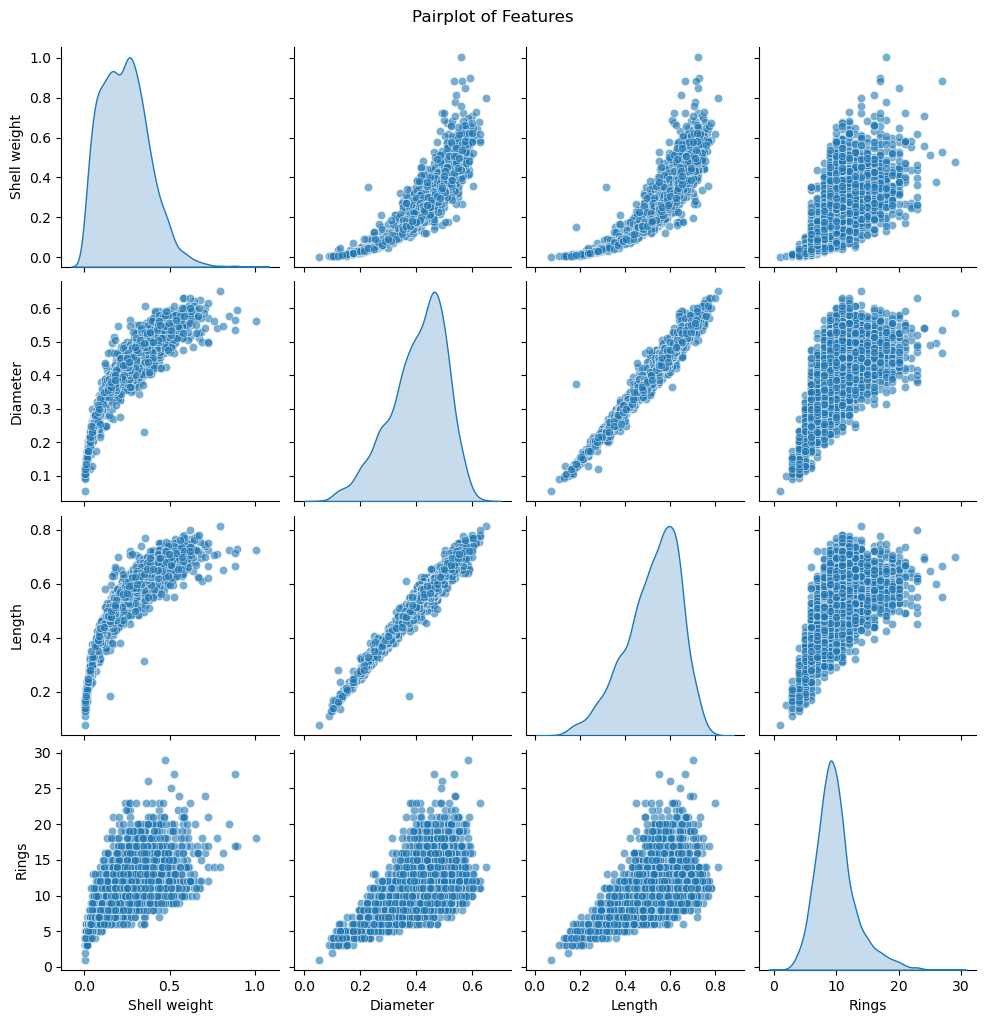

In [829]:
key_features = ['Shell weight', 'Diameter', 'Length', 'Rings']
sns.pairplot(df[key_features], diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

The pairplot shows that the numerical features are strongly related to each other. Length diameter and shell weight increase together which indicates proportional growth in abalones. When these features are compared with Rings there is a clear upward trend. Abalones with larger size and higher weight generally have more rings. At higher ring values the points become more spread out which shows that growth becomes more varied as abalones age. This suggests that size alone cannot fully explain age and supports the use of models that can capture non linear relationships.

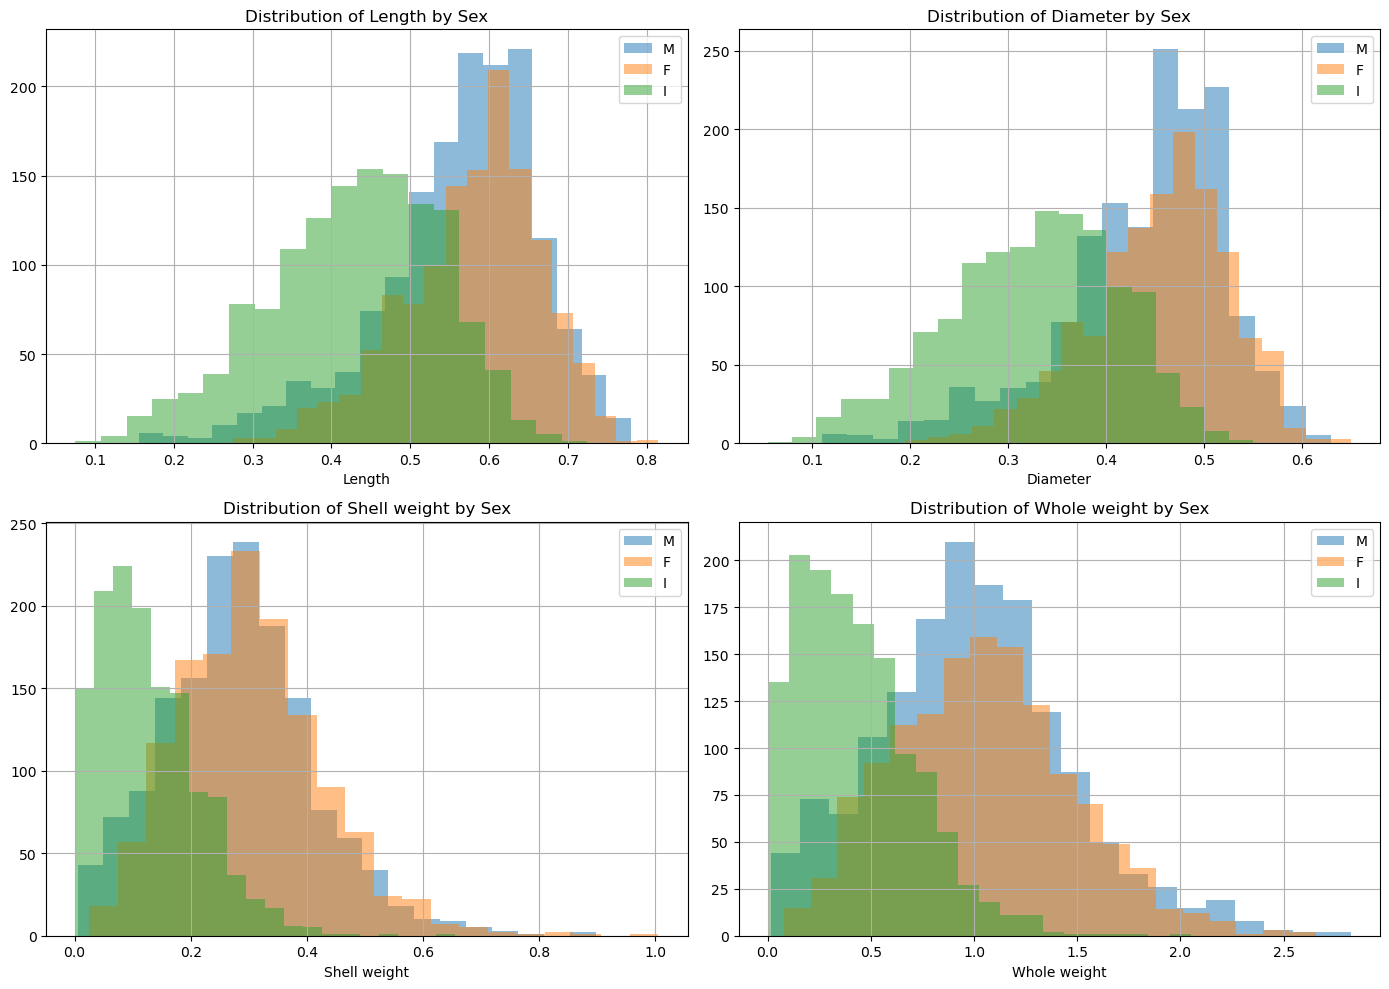

In [830]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features_to_plot = ['Length', 'Diameter', 'Shell weight', 'Whole weight']
for idx, feature in enumerate(features_to_plot):
    ax = axes[idx//2, idx%2]
    for sex in df['Sex'].unique():
        df[df['Sex']==sex][feature].hist(bins=20, alpha=0.5, label=sex, ax=ax)
    ax.set_xlabel(feature)
    ax.set_title(f'Distribution of {feature} by Sex')
    ax.legend()
plt.tight_layout()
plt.show()

The feature distributions by sex show clear differences between infant and mature abalones. Infant abalones consistently have smaller length diameter and weight values which reflects their early growth stage. Male and female abalones show similar distributions across most features which indicates comparable growth patterns. Males tend to have slightly higher size and weight values but the overlap is large. This shows that sex provides useful biological context but is not sufficient on its own to predict age and should be combined with physical measurements.

# 3. Data Preparation

## 3.1 Data Cleaning

In [831]:
##Clean data
#Checking missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [832]:
#Checking duplicates
df.duplicated().sum()

np.int64(0)

In [833]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [834]:
## Clean data
# OHE
sex_df = pd.get_dummies(df['Sex']).astype(int)
df.drop(['Sex'], inplace=True, axis = 1)
df = pd.concat([df, sex_df], axis = 1)
df.drop("F", axis=1, inplace=True)
df.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,I,M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,1,0


In [835]:
#Drop target variable
X = df.drop("Rings",axis=1)
y=df["Rings"]
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,I,M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,1,0
...,...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,0
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,1
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,1
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,0


In [836]:
zero_height = (df['Height'] == 0).sum()
print(f"\nRecords with Height = 0: {zero_height}")


Records with Height = 0: 2


In [837]:
height_median = df.loc[df["Height"] > 0, "Height"].median()
df.loc[df["Height"] == 0, "Height"] = height_median

In [838]:
zero_height_after = (df['Height'] == 0).sum()
print(f"Records with Height = 0 after cleaning: {zero_height_after}")
print("Minimum Height:", df["Height"].min())


Records with Height = 0 after cleaning: 0
Minimum Height: 0.01


Two records contained zero values for the Height feature, which is biologically unrealistic. Given the very small number of affected observations, these values were replaced with the median height to preserve dataset size while ensuring physical plausibility.

In [839]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
negative_values = (df[numeric_cols] < 0).sum()
print("\nNegative values per column:")
print(negative_values[negative_values > 0])


Negative values per column:
Series([], dtype: int64)


Outliers were not removed from the dataset because they represent valid biological variation rather than data errors. In abalone growth data, extreme values often correspond to very young or very old individuals which naturally differ in size and weight from the majority of the population. Removing these observations would reduce the model’s ability to learn age-related patterns across the full lifespan of abalones. In addition, exploratory data analysis showed that outliers were primarily present in weight and size features and followed a continuous distribution without abrupt gaps. This indicates that the extreme values are plausible measurements rather than anomalies caused by data collection issues. Eliminating such values could bias the model toward average-sized abalones and weaken its performance on less common age groups. Therefore, instead of removing outliers, they were retained and handled through appropriate modelling choices and evaluation metrics that are robust to extreme values. This approach preserves important information while maintaining the integrity of the biological data.

## 3.2 Train-Test Split

In [840]:
## Split data into train set and test set
test_size = 0.3 
random_state = 2026 ## For reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

# 4. Modelling

### 4.2 Train Model

In [841]:
## Initialise and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)


# 5. Model Evaluation

## Linear Regression (Base Model)

In [842]:
# Evaluation
print("Linear Regression")

print("Train MAE :", mean_absolute_error(y_train, y_train_pred_lr))
print("Test  MAE :", mean_absolute_error(y_test, y_test_pred_lr))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_lr)))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_lr)))

print("Train R^2 :", r2_score(y_train, y_train_pred_lr))
print("Test  R^2 :", r2_score(y_test, y_test_pred_lr))

Linear Regression
Train MAE : 1.5731121291795613
Test  MAE : 1.6079189503962112
Train RMSE: 2.189013677976699
Test  RMSE: 2.200758390025431
Train R^2 : 0.5406538931253659
Test  R^2 : 0.5292741670969768


Linear Regression was used as a baseline model. It produced a test RMSE of about 2.22 and test R² of about 0.52. One strength of Linear Regression is that it showed very similar performance on the training and test sets which means it is stable and does not overfit. However, its overall accuracy is lower compared to the other models. This suggests that the relationship between the features (size/weights) and the target (Rings) is not perfectly linear. Abalone growth patterns can be complex and a simple linear model may not capture all important patterns in the data.

## Random Forest (Other Model)

Justification

In [843]:
#Train random forest
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=2026
)

# Train model
rf.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [844]:
# Evaluation
print("Random Forest Regressor")

print("Train MAE :", mean_absolute_error(y_train, y_train_pred_rf))
print("Test  MAE :", mean_absolute_error(y_test, y_test_pred_rf))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))

print("Train R^2 :", r2_score(y_train, y_train_pred_rf))
print("Test  R^2 :", r2_score(y_test, y_test_pred_rf))

Random Forest Regressor
Train MAE : 0.568613296841145
Test  MAE : 1.530654429369513
Train RMSE: 0.7991008198895783
Test  RMSE: 2.1619752450443195
Train R^2 : 0.9387866367056132
Test  R^2 : 0.5457188317657571


Random Forest Regressor achieved the best training performance with very low training error and very high training R² (around 0.94). However, its test performance did not improve by the same amount. The model had a large gap between training and test results (train RMSE ≈ 0.80 vs test RMSE ≈ 2.16). This indicates overfitting which means the model learned the training data too well and did not generalise as reliably to new data. Even though Random Forest had slightly better test RMSE and test R² than Linear Regression, the overfitting behaviour makes it less dependable especially when predicting new data outside the training sample.

## Gradient Boosting Regressor (Other Model)

In [845]:
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=2026
)

# Train
gbr.fit(X_train, y_train)

# Predict
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Evaluate
results = {
    'Model': 'GradientBoostingRegressor',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'Train_R^2': r2_score(y_train, y_train_pred),
    'Train_RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Train_MAE': mean_absolute_error(y_train, y_train_pred),
    'Test_R^2': r2_score(y_test, y_test_pred),
    'Test_RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Test_MAE': mean_absolute_error(y_test, y_test_pred)
}


print(f"Hyperparameters:")
print(f"  n_estimators: {results['n_estimators']}")
print(f"  learning_rate: {results['learning_rate']}")
print(f"  max_depth: {results['max_depth']}")
print(f"\nTraining Set Performance:")
print(f"  R^2: {results['Train_R^2']:.4f}")
print(f"  RMSE: {results['Train_RMSE']:.4f}")
print(f"  MAE: {results['Train_MAE']:.4f}")
print(f"\nTest Set Performance:")
print(f"  R^2: {results['Test_R^2']:.4f}")
print(f"  RMSE: {results['Test_RMSE']:.4f}")
print(f"  MAE: {results['Test_MAE']:.4f}")

Hyperparameters:
  n_estimators: 100
  learning_rate: 0.1
  max_depth: 3

Training Set Performance:
  R^2: 0.6706
  RMSE: 1.8536
  MAE: 1.3402

Test Set Performance:
  R^2: 0.5337
  RMSE: 2.1905
  MAE: 1.5429


Gradient Boosting Regressor provides the best balance between performance and generalisation. Its test RMSE and test R² were slightly better than Linear Regression and very close to Random Forest. However, unlike Random Forest, Gradient Boosting showed a smaller gap between training and testing performance. This indicates that the model fits the data well without strongly memorising the training set. 

Among the evaluated baseline models, Gradient Boosting Regressor was selected as **the best model** prior to feature engineering. Although Random Forest achieved slightly lower test error, it exhibited substantial overfitting as indicated by a large gap between training and test performance. Linear Regression showed stable but weaker performance due to its limited ability to model non-linear relationships. Gradient Boosting provided the best balance between predictive accuracy and generalisation, making it the most suitable baseline model

## Iterative model development


In [846]:
# Get feature importance values
importances = gbr.feature_importances_

# Create a DataFrame
fi_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
})

# Sort by importance
fi_df = fi_df.sort_values(by="Importance", ascending=False)

print(fi_df)

          Feature  Importance
6    Shell weight    0.655942
4  Shucked weight    0.172937
2          Height    0.044930
3    Whole weight    0.037177
1        Diameter    0.026595
7               I    0.024506
0          Length    0.019454
5  Viscera weight    0.018261
8               M    0.000198


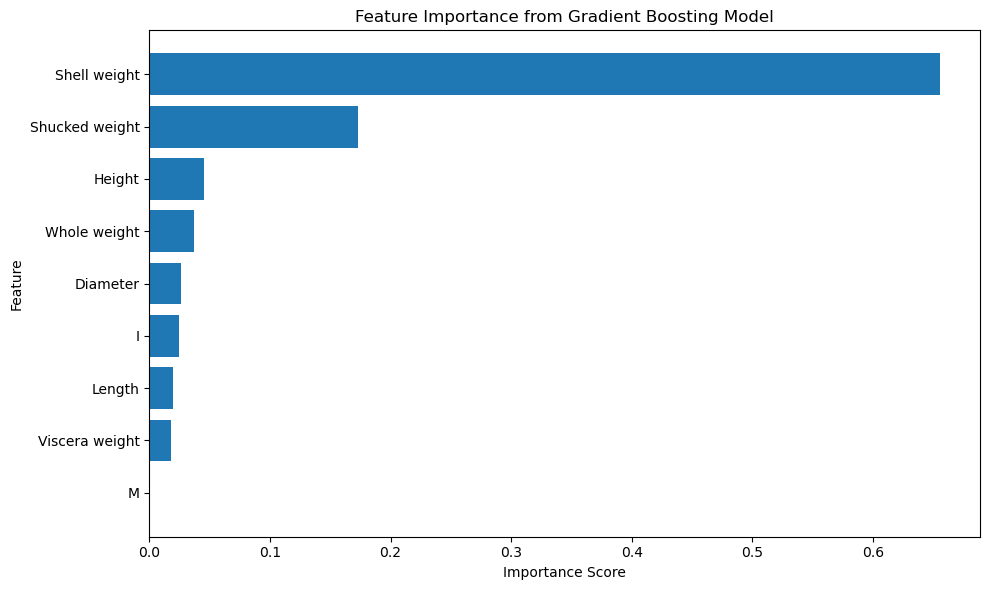

In [847]:
# Plot feature importance
plt.figure(figsize=(10, 6))

plt.barh(
    fi_df["Feature"],
    fi_df["Importance"]
)

plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance from Gradient Boosting Model")

# Invert y-axis so most important feature is on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

The feature importance results show that the Gradient Boosting model relies mainly on weight-related features to predict Rings (age). Shell weight is the most influential feature by far. This means that many of the model’s decision splits use shell weight because it reduces prediction error the most. In real terms, a heavier shell usually indicates an older abalone so this pattern is realistic and matches the growth behaviour of abalones.

The second most important feature is Shucked weight which also represents overall body size and maturity. Together, shell weight and shucked weight make up most of the model’s decision-making. This suggests that mass/weight is a stronger signal of age than simple size measurements because weight changes noticeably as an abalone grows and develops.
Features like Height and Whole weight have moderate importance. This indicates they still help the model but they are not as strong as shell weight and shucked weight. Size measurements such as Diameter and Length show smaller contributions. This does not mean they are useless but it simply means that when the model compares splits, weight features give clearer improvement than length/diameter in most cases. In addition, physical measurements are often correlated (bigger abalones tend to be longer, heavier and wider), so the model may prefer one variable over another even if they contain similar information.

For the Sex categories, I (infant) has a small but noticeable importance while F and especially M have very low importance. This suggests that the model uses the “infant” category slightly to separate younger abalones which makes sense because infants generally have fewer rings. However, male and female categories contribute very little which means that once size and weight are known, sex does not add much extra information for predicting age. This supports the idea that physical growth features are the main drivers of age and sex is a weaker factor.

In [848]:
X = df.drop(columns=["Rings"]).copy()
y = df["Rings"]

In [849]:
print("Current features:", X.columns.tolist())
print(f"Starting with {len(X.columns)} features\n")

Current features: ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'I', 'M']
Starting with 9 features



### Feature Engineering Strategy

Based on the feature importance analysis, the following improvements were made:

**Feature Selection:**
- Dropped F and M (very low importance < 0.01)
- Retained I (Infant) as it showed moderate importance (0.022)

**New Features Created:**
The following features were engineered based on biological knowledge and the finding 
that weight-related features (especially Shell weight) are most predictive:

1. **Volume**: 3D size measure (π × r² × h)
2. **Density**: Weight per unit volume (indicates body composition)
3. **Shell_Ratio**: Shell proportion (increases with age)
4. **Shucked_Ratio**: Meat proportion  
5. **Meat_Ratio**: Combined soft tissue proportion
6. **Shell_Thickness**: Shell weight relative to diameter (from EDA: shell weight 
   had highest correlation with Rings)
7. **Length_Diameter_Ratio**: Body shape indicator
8. **Height_Diameter_Ratio**: Vertical proportion indicator

These features transform raw measurements into biologically meaningful patterns that 
capture age-related growth changes in abalones.

In [850]:
# Drop low-importance features
X = X.drop(columns=["F", "M"], errors='ignore')

# Create new features
# Volume (3D size)
X['Volume'] = (X['Diameter'] / 2) ** 2 * 3.14159 * X['Height']
print("Created: Volume")

# Density  
X['Density'] = X['Whole weight'] / (X['Volume'] + 1e-8)
print("Created: Density")

# Weight ratios
X['Shell_Ratio'] = X['Shell weight'] / (X['Whole weight'] + 1e-8)
X['Shucked_Ratio'] = X['Shucked weight'] / (X['Whole weight'] + 1e-8)
X['Meat_Ratio'] = (X['Shucked weight'] + X['Viscera weight']) / (X['Whole weight'] + 1e-8)
print("Created: Shell_Ratio, Shucked_Ratio, Meat_Ratio")

# Shell thickness
X['Shell_Thickness'] = X['Shell weight'] / (X['Diameter'] + 1e-8)
print("Created: Shell_Thickness")

# Shape ratios
X['Length_Diameter_Ratio'] = X['Length'] / (X['Diameter'] + 1e-8)
X['Height_Diameter_Ratio'] = X['Height'] / (X['Diameter'] + 1e-8)
print("Created: Length_Diameter_Ratio, Height_Diameter_Ratio")

print(f"\nFeature engineering complete!")
print(f"  Features before: {len(X.columns) - 9} (after dropping F, M)")
print(f"  Features after: {len(X.columns)}")
print(f"  New features: {len(X.columns) - (len(X.columns) - 9)}")

Created: Volume
Created: Density
Created: Shell_Ratio, Shucked_Ratio, Meat_Ratio
Created: Shell_Thickness
Created: Length_Diameter_Ratio, Height_Diameter_Ratio

Feature engineering complete!
  Features before: 7 (after dropping F, M)
  Features after: 16
  New features: 9


In [851]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,I,Volume,Density,Shell_Ratio,Shucked_Ratio,Meat_Ratio,Shell_Thickness,Length_Diameter_Ratio,Height_Diameter_Ratio
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0.004964,45.427820,0.310421,0.441242,0.656319,0.264151,1.320755,0.339623
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,0.018703,36.196499,0.310192,0.378877,0.587888,0.500000,1.261905,0.321429
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0.013079,39.451554,0.300388,0.417636,0.638566,0.424658,1.205479,0.342466
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,0.004086,50.175642,0.268293,0.436585,0.629268,0.215686,1.294118,0.313725
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,1,0.006715,52.344259,0.341394,0.401138,0.621622,0.400000,1.416667,0.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,0.026242,33.800643,0.280722,0.417136,0.686584,0.553333,1.255556,0.366667
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0.020527,47.059605,0.269669,0.454451,0.676501,0.592045,1.340909,0.306818
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0.036327,32.372527,0.261905,0.446854,0.691327,0.648421,1.263158,0.431579
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,0.027712,39.495840,0.270443,0.485153,0.723618,0.610309,1.288660,0.309278


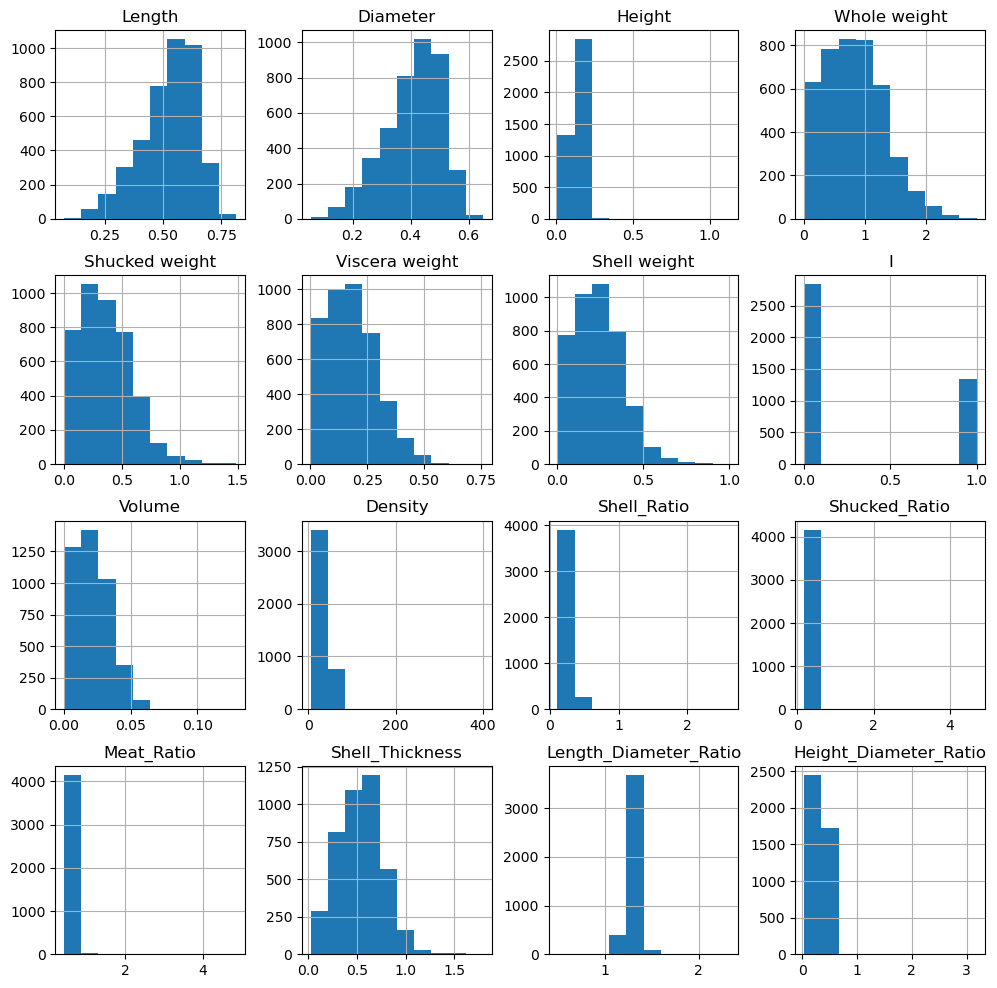

In [852]:
X.hist(figsize=(12,12))
plt.show()

In [853]:
## Train-test split after feature engineering
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=2026
)

In [854]:
# Initialise and train model after feature engineering
gbr_fe = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=2026
)

# Train
gbr_fe.fit(X_train_fe, y_train_fe)

# Predict
y_train_pred_fe = gbr_fe.predict(X_train_fe)
y_test_pred_fe = gbr_fe.predict(X_test_fe)

# Evaluate
results_fe = {
    'Model': 'GradientBoostingRegressor',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'Train_R^2': r2_score(y_train_fe, y_train_pred_fe),
    'Train_RMSE': np.sqrt(mean_squared_error(y_train_fe, y_train_pred_fe)),
    'Train_MAE': mean_absolute_error(y_train_fe, y_train_pred_fe),
    'Test_R^2': r2_score(y_test_fe, y_test_pred_fe),
    'Test_RMSE': np.sqrt(mean_squared_error(y_test_fe, y_test_pred_fe)),
    'Test_MAE': mean_absolute_error(y_test_fe, y_test_pred_fe)
}


print(f"Hyperparameters:")
print(f"  n_estimators: {results_fe['n_estimators']}")
print(f"  learning_rate: {results_fe['learning_rate']}")
print(f"  max_depth: {results_fe['max_depth']}")
print(f"\nTraining Set Performance:")
print(f"  R^2: {results_fe['Train_R^2']:.4f}")
print(f"  RMSE: {results_fe['Train_RMSE']:.4f}")
print(f"  MAE: {results_fe['Train_MAE']:.4f}")
print(f"\nTest Set Performance:")
print(f"  R^2: {results_fe['Test_R^2']:.4f}")
print(f"  RMSE: {results_fe['Test_RMSE']:.4f}")
print(f"  MAE: {results_fe['Test_MAE']:.4f}")

Hyperparameters:
  n_estimators: 100
  learning_rate: 0.1
  max_depth: 3

Training Set Performance:
  R^2: 0.7069
  RMSE: 1.7486
  MAE: 1.2719

Test Set Performance:
  R^2: 0.5579
  RMSE: 2.1329
  MAE: 1.4807


### Before Feature Engineering Vs. After Feature Engineering

In [855]:
results_afterfe = pd.DataFrame({
    "Model": ["Before Feature Engineering", "After Feature Engineering"],
    "RMSE": [2.1905, 2.1329],
    "MAE": [1.5429, 1.4807],
    "R^2": [0.5337, 0.5579]
})

results_afterfe

,Model,RMSE,MAE,R^2
0,Before Feature Engineering,2.1905,1.5429,0.5337
1,After Feature Engineering,2.1329,1.4807,0.5579


After feature engineering, the model shows a clear improvement in performance. The Test R² increases compared to the model before feature engineering which means the model is able to explain more variation in the abalone age. At the same time, both Test RMSE and Test MAE decrease indicating that prediction errors become smaller on unseen data. This shows that the new features help the model learn more useful patterns rather than noise.
Feature engineering improves the relationship between input variables and the target by adding more informative representations of the data. As a result, the Gradient Boosting model can make better splits and more accurate predictions. The consistent improvement across multiple metrics suggests that feature engineering enhances generalisation and makes the model more reliable for age prediction.

### Hyperparameter Tuning

Hyperparameter tuning was carried out to improve the performance of the Gradient Boosting Regressor after feature engineering. The baseline model used default or initial settings and served as a reference point. A tuning strategy was then applied to search for better settings that reduce prediction error while maintaining good generalisation on unseen data.
RandomizedSearchCV with 5 fold cross validation was used because it explores a range of values efficiently without testing every possible combination. 

In [856]:
# First, check what keys are in results_fe
print("Available keys in results_fe:")
print(results_fe.keys())

Available keys in results_fe:
dict_keys(['Model', 'n_estimators', 'learning_rate', 'max_depth', 'Train_R^2', 'Train_RMSE', 'Train_MAE', 'Test_R^2', 'Test_RMSE', 'Test_MAE'])


In [857]:
# n_estimators + learning_rate
print("PAIR 1: n_estimators + learning_rate")

param_dist_1 = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1]
}

rs_1 = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=2026),
    param_distributions=param_dist_1,
    n_iter=9,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=2026,
    n_jobs=-1,
    verbose=0
)

# FIT on feature engineered data
rs_1.fit(X_train_fe, y_train_fe)

# Best model
best_model_1 = rs_1.best_estimator_
y_test_pred_1 = best_model_1.predict(X_test_fe)

# Evaluate
test_r2_1 = r2_score(y_test_fe, y_test_pred_1)
test_rmse_1 = np.sqrt(mean_squared_error(y_test_fe, y_test_pred_1))
test_mae_1 = mean_absolute_error(y_test_fe, y_test_pred_1)

# Calculate improvements (compare against FE baseline)
r2_imp_1 = ((test_r2_1 - results_fe['Test_R^2']) / results_fe['Test_R^2']) * 100
rmse_imp_1 = ((results_fe['Test_RMSE'] - test_rmse_1) / results_fe['Test_RMSE']) * 100
mae_imp_1 = ((results_fe['Test_MAE'] - test_mae_1) / results_fe['Test_MAE']) * 100

print(f"Best Hyperparameters: {rs_1.best_params_}")

comparison_1 = pd.DataFrame({
    'Metric': ['R^2', 'RMSE', 'MAE'],
    'Baseline': [
        f"{results_fe['Test_R^2']:.4f}",
        f"{results_fe['Test_RMSE']:.4f}",
        f"{results_fe['Test_MAE']:.4f}"
    ],
    'Tuned': [
        f"{test_r2_1:.4f}",
        f"{test_rmse_1:.4f}",
        f"{test_mae_1:.4f}"
    ],
    'Change (%)': [
        f"{r2_imp_1:+.2f}%",
        f"{rmse_imp_1:+.2f}%",
        f"{mae_imp_1:+.2f}%"
    ]
})

print("\nComparison Table:")
print(comparison_1.to_string(index=False))


PAIR 1: n_estimators + learning_rate
Best Hyperparameters: {'n_estimators': 100, 'learning_rate': 0.05}

Comparison Table:
Metric Baseline  Tuned Change (%)
   R^2   0.5579 0.5684     +1.90%
  RMSE   2.1329 2.1072     +1.20%
   MAE   1.4807 1.4746     +0.41%


In [858]:
# n_estimators + max_depth
print("PAIR 2: n_estimators + max_depth")

param_dist_2 = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 4, 5]
}

rs_2 = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=2026),
    param_distributions=param_dist_2,
    n_iter=9,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=2026,
    n_jobs=-1,
    verbose=0
)

# FIT on feature engineered data
rs_2.fit(X_train_fe, y_train_fe)

# Best model
best_model_2 = rs_2.best_estimator_
y_test_pred_2 = best_model_2.predict(X_test_fe)

# Evaluate
test_r2_2 = r2_score(y_test_fe, y_test_pred_2)
test_rmse_2 = np.sqrt(mean_squared_error(y_test_fe, y_test_pred_2))
test_mae_2 = mean_absolute_error(y_test_fe, y_test_pred_2)

# Calculate improvements (compare against FE baseline)
r2_imp_2 = ((test_r2_2 - results_fe['Test_R^2']) / results_fe['Test_R^2']) * 100
rmse_imp_2 = ((results_fe['Test_RMSE'] - test_rmse_2) / results_fe['Test_RMSE']) * 100
mae_imp_2 = ((results_fe['Test_MAE'] - test_mae_2) / results_fe['Test_MAE']) * 100

print(f"Best Hyperparameters: {rs_2.best_params_}")

comparison_2 = pd.DataFrame({
    'Metric': ['R^2', 'RMSE', 'MAE'],
    'Baseline': [
        f"{results_fe['Test_R^2']:.4f}",
        f"{results_fe['Test_RMSE']:.4f}",
        f"{results_fe['Test_MAE']:.4f}"
    ],
    'Tuned': [
        f"{test_r2_2:.4f}",
        f"{test_rmse_2:.4f}",
        f"{test_mae_2:.4f}"
    ],
    'Change (%)': [
        f"{r2_imp_2:+.2f}%",
        f"{rmse_imp_2:+.2f}%",
        f"{mae_imp_2:+.2f}%"
    ]
})

print("\nComparison Table:")
print(comparison_2.to_string(index=False))

PAIR 2: n_estimators + max_depth
Best Hyperparameters: {'n_estimators': 100, 'max_depth': 3}

Comparison Table:
Metric Baseline  Tuned Change (%)
   R^2   0.5579 0.5579     +0.00%
  RMSE   2.1329 2.1329     +0.00%
   MAE   1.4807 1.4807     +0.00%


In [859]:
# learning_rate + max_depth
print("PAIR 3: learning_rate + max_depth")

param_dist_3 = {
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5]
}

rs_3 = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=2026),
    param_distributions=param_dist_3,
    n_iter=9,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=2026,
    n_jobs=-1,
    verbose=0
)

# FIT on feature engineered data
rs_3.fit(X_train_fe, y_train_fe)

# Best model
best_model_3 = rs_3.best_estimator_
y_test_pred_3 = best_model_3.predict(X_test_fe)

# Evaluate
test_r2_3 = r2_score(y_test_fe, y_test_pred_3)
test_rmse_3 = np.sqrt(mean_squared_error(y_test_fe, y_test_pred_3))
test_mae_3 = mean_absolute_error(y_test_fe, y_test_pred_3)

# Calculate improvements (compare against FE baseline)
r2_imp_3 = ((test_r2_3 - results_fe['Test_R^2']) / results_fe['Test_R^2']) * 100
rmse_imp_3 = ((results_fe['Test_RMSE'] - test_rmse_3) / results_fe['Test_RMSE']) * 100
mae_imp_3 = ((results_fe['Test_MAE'] - test_mae_3) / results_fe['Test_MAE']) * 100

print(f"Best Hyperparameters: {rs_3.best_params_}")

comparison_3 = pd.DataFrame({
    'Metric': ['R^2', 'RMSE', 'MAE'],
    'Baseline': [
        f"{results_fe['Test_R^2']:.4f}",
        f"{results_fe['Test_RMSE']:.4f}",
        f"{results_fe['Test_MAE']:.4f}"
    ],
    'Tuned': [
        f"{test_r2_3:.4f}",
        f"{test_rmse_3:.4f}",
        f"{test_mae_3:.4f}"
    ],
    'Change (%)': [
        f"{r2_imp_3:+.2f}%",
        f"{rmse_imp_3:+.2f}%",
        f"{mae_imp_3:+.2f}%"
    ]
})

print("\nComparison Table:")
print(comparison_3.to_string(index=False))


PAIR 3: learning_rate + max_depth
Best Hyperparameters: {'max_depth': 3, 'learning_rate': 0.05}

Comparison Table:
Metric Baseline  Tuned Change (%)
   R^2   0.5579 0.5684     +1.90%
  RMSE   2.1329 2.1072     +1.20%
   MAE   1.4807 1.4746     +0.41%


In [860]:
# n_estimators + min_samples_split
print("PAIR 4: n_estimators + min_samples_split")

param_dist_4 = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 5, 10]
}

rs_4 = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=2026),
    param_distributions=param_dist_4,
    n_iter=9,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=2026,
    n_jobs=-1,
    verbose=0
)

# FIT on feature engineered data
rs_4.fit(X_train_fe, y_train_fe)

# Best model
best_model_4 = rs_4.best_estimator_
y_test_pred_4 = best_model_4.predict(X_test_fe)

# Evaluate
test_r2_4 = r2_score(y_test_fe, y_test_pred_4)
test_rmse_4 = np.sqrt(mean_squared_error(y_test_fe, y_test_pred_4))
test_mae_4 = mean_absolute_error(y_test_fe, y_test_pred_4)

# Calculate improvements (compare against FE baseline)
r2_imp_4 = ((test_r2_4 - results_fe['Test_R^2']) / results_fe['Test_R^2']) * 100
rmse_imp_4 = ((results_fe['Test_RMSE'] - test_rmse_4) / results_fe['Test_RMSE']) * 100
mae_imp_4 = ((results_fe['Test_MAE'] - test_mae_4) / results_fe['Test_MAE']) * 100

print(f"Best Hyperparameters: {rs_4.best_params_}")

comparison_4 = pd.DataFrame({
    'Metric': ['R^2', 'RMSE', 'MAE'],
    'Baseline': [
        f"{results_fe['Test_R^2']:.4f}",
        f"{results_fe['Test_RMSE']:.4f}",
        f"{results_fe['Test_MAE']:.4f}"
    ],
    'Tuned': [
        f"{test_r2_4:.4f}",
        f"{test_rmse_4:.4f}",
        f"{test_mae_4:.4f}"
    ],
    'Change (%)': [
        f"{r2_imp_4:+.2f}%",
        f"{rmse_imp_4:+.2f}%",
        f"{mae_imp_4:+.2f}%"
    ]
})

print("\nComparison Table:")
print(comparison_4.to_string(index=False))


PAIR 4: n_estimators + min_samples_split
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5}

Comparison Table:
Metric Baseline  Tuned Change (%)
   R^2   0.5579 0.5564     -0.27%
  RMSE   2.1329 2.1365     -0.17%
   MAE   1.4807 1.4801     +0.04%


In [861]:
# learning_rate + subsample
print("PAIR 5: learning_rate + subsample")

param_dist_5 = {
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 0.9, 1.0]
}

rs_5 = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=2026),
    param_distributions=param_dist_5,
    n_iter=9,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=2026,
    n_jobs=-1,
    verbose=0
)

# FIT on feature engineered data
rs_5.fit(X_train_fe, y_train_fe)

# Best model
best_model_5 = rs_5.best_estimator_
y_test_pred_5 = best_model_5.predict(X_test_fe)

# Evaluate
test_r2_5 = r2_score(y_test_fe, y_test_pred_5)
test_rmse_5 = np.sqrt(mean_squared_error(y_test_fe, y_test_pred_5))
test_mae_5 = mean_absolute_error(y_test_fe, y_test_pred_5)

# Calculate improvements (compare against FE baseline)
r2_imp_5 = ((test_r2_5 - results_fe['Test_R^2']) / results_fe['Test_R^2']) * 100
rmse_imp_5 = ((results_fe['Test_RMSE'] - test_rmse_5) / results_fe['Test_RMSE']) * 100
mae_imp_5 = ((results_fe['Test_MAE'] - test_mae_5) / results_fe['Test_MAE']) * 100

print(f"Best Hyperparameters: {rs_5.best_params_}")

comparison_5 = pd.DataFrame({
    'Metric': ['R^2', 'RMSE', 'MAE'],
    'Baseline': [
        f"{results_fe['Test_R^2']:.4f}",
        f"{results_fe['Test_RMSE']:.4f}",
        f"{results_fe['Test_MAE']:.4f}"
    ],
    'Tuned': [
        f"{test_r2_5:.4f}",
        f"{test_rmse_5:.4f}",
        f"{test_mae_5:.4f}"
    ],
    'Change (%)': [
        f"{r2_imp_5:+.2f}%",
        f"{rmse_imp_5:+.2f}%",
        f"{mae_imp_5:+.2f}%"
    ]
})

print("\nComparison Table:")
print(comparison_5.to_string(index=False))


PAIR 5: learning_rate + subsample
Best Hyperparameters: {'subsample': 0.8, 'learning_rate': 0.05}

Comparison Table:
Metric Baseline  Tuned Change (%)
   R^2   0.5579 0.5614     +0.64%
  RMSE   2.1329 2.1243     +0.40%
   MAE   1.4807 1.4799     +0.06%


In [862]:
# max_depth + min_samples_split
print("PAIR 6: max_depth + min_samples_split")

param_dist_6 = {
    "max_depth": [3, 4, 5],
    "min_samples_split": [2, 5, 10]
}

rs_6 = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=2026),
    param_distributions=param_dist_6,
    n_iter=9,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=2026,
    n_jobs=-1,
    verbose=0
)

# FIT on feature engineered data
rs_6.fit(X_train_fe, y_train_fe)

# Best model
best_model_6 = rs_6.best_estimator_
y_test_pred_6 = best_model_6.predict(X_test_fe)

# Evaluate
test_r2_6 = r2_score(y_test_fe, y_test_pred_6)
test_rmse_6 = np.sqrt(mean_squared_error(y_test_fe, y_test_pred_6))
test_mae_6 = mean_absolute_error(y_test_fe, y_test_pred_6)

# Calculate improvements (compare against FE baseline)
r2_imp_6 = ((test_r2_6 - results_fe['Test_R^2']) / results_fe['Test_R^2']) * 100
rmse_imp_6 = ((results_fe['Test_RMSE'] - test_rmse_6) / results_fe['Test_RMSE']) * 100
mae_imp_6 = ((results_fe['Test_MAE'] - test_mae_6) / results_fe['Test_MAE']) * 100

print(f"Best Hyperparameters: {rs_6.best_params_}")

comparison_6 = pd.DataFrame({
    'Metric': ['R^2', 'RMSE', 'MAE'],
    'Baseline': [
        f"{results_fe['Test_R^2']:.4f}",
        f"{results_fe['Test_RMSE']:.4f}",
        f"{results_fe['Test_MAE']:.4f}"
    ],
    'Tuned': [
        f"{test_r2_6:.4f}",
        f"{test_rmse_6:.4f}",
        f"{test_mae_6:.4f}"
    ],
    'Change (%)': [
        f"{r2_imp_6:+.2f}%",
        f"{rmse_imp_6:+.2f}%",
        f"{mae_imp_6:+.2f}%"
    ]
})

print("\nComparison Table:")
print(comparison_6.to_string(index=False))


PAIR 6: max_depth + min_samples_split
Best Hyperparameters: {'min_samples_split': 5, 'max_depth': 3}

Comparison Table:
Metric Baseline  Tuned Change (%)
   R^2   0.5579 0.5564     -0.27%
  RMSE   2.1329 2.1365     -0.17%
   MAE   1.4807 1.4801     +0.04%


In [863]:
#FINAL SUMMARY
print("FINAL SUMMARY: ALL 6 PAIRS COMPARISON")

summary = pd.DataFrame({
    'Pair': [
        'Pair 1: n_estimators + learning_rate',
        'Pair 2: n_estimators + max_depth',
        'Pair 3: learning_rate + max_depth',
        'Pair 4: n_estimators + min_samples_split',
        'Pair 5: learning_rate + subsample',
        'Pair 6: max_depth + min_samples_split'
    ],
    'Best Parameters': [
        str(rs_1.best_params_),
        str(rs_2.best_params_),
        str(rs_3.best_params_),
        str(rs_4.best_params_),
        str(rs_5.best_params_),
        str(rs_6.best_params_)
    ],
    'Test R²': [
        f"{test_r2_1:.4f}",
        f"{test_r2_2:.4f}",
        f"{test_r2_3:.4f}",
        f"{test_r2_4:.4f}",
        f"{test_r2_5:.4f}",
        f"{test_r2_6:.4f}"
    ],
    'Test MAE': [
        f"{test_mae_1:.4f}",
        f"{test_mae_2:.4f}",
        f"{test_mae_3:.4f}",
        f"{test_mae_4:.4f}",
        f"{test_mae_5:.4f}",
        f"{test_mae_6:.4f}"
    ],
    'Test RMSE': [
        f"{test_rmse_1:.4f}",
        f"{test_rmse_2:.4f}",
        f"{test_rmse_3:.4f}",
        f"{test_rmse_4:.4f}",
        f"{test_rmse_5:.4f}",
        f"{test_rmse_6:.4f}"
    ],
    'RMSE Improvement': [
        f"{rmse_imp_1:+.2f}%",
        f"{rmse_imp_2:+.2f}%",
        f"{rmse_imp_3:+.2f}%",
        f"{rmse_imp_4:+.2f}%",
        f"{rmse_imp_5:+.2f}%",
        f"{rmse_imp_6:+.2f}%"
    ]
})

print(summary.to_string(index=False))

FINAL SUMMARY: ALL 6 PAIRS COMPARISON
                                    Pair                               Best Parameters Test R² Test MAE Test RMSE RMSE Improvement
    Pair 1: n_estimators + learning_rate  {'n_estimators': 100, 'learning_rate': 0.05}  0.5684   1.4746    2.1072           +1.20%
        Pair 2: n_estimators + max_depth         {'n_estimators': 100, 'max_depth': 3}  0.5579   1.4807    2.1329           +0.00%
       Pair 3: learning_rate + max_depth       {'max_depth': 3, 'learning_rate': 0.05}  0.5684   1.4746    2.1072           +1.20%
Pair 4: n_estimators + min_samples_split {'n_estimators': 100, 'min_samples_split': 5}  0.5564   1.4801    2.1365           -0.17%
       Pair 5: learning_rate + subsample     {'subsample': 0.8, 'learning_rate': 0.05}  0.5614   1.4799    2.1243           +0.40%
   Pair 6: max_depth + min_samples_split      {'min_samples_split': 5, 'max_depth': 3}  0.5564   1.4801    2.1365           -0.17%


Pair 1 gives the best overall performance among all six pairs. It has the highest Test R² (0.5684) which means it explains the most variation in abalone age. It also has the lowest Test RMSE (2.1072) and the largest improvement in RMSE (+1.20%) showing that prediction errors are slightly smaller compared to the baseline model. The Test MAE is also one of the lowest which means the average prediction error is reduced.
Pair 3 shows the same numerical results but Pair 1 is preferred because it tunes n_estimators and learning_rate which are the most important parameters in Gradient Boosting. These parameters control how fast the model learns and how complex it becomes so improving them usually leads to more stable and reliable performance.
Overall, Pair 1 is the best choice because it improves accuracy, reduces error and controls model learning in a more meaningful and reliable way.

### Before Tuning Vs. After Tuning

In [864]:
# Final results DataFrame
results_aftertune = pd.DataFrame({
    "Model": ["Baseline Gradient Boosting", "Tuned Gradient Boosting"],
    "RMSE": [2.1329, 2.1072],
    "MAE": [1.4807, 1.4746],
    "R^2": [0.5579, 0.5684]
})

results_aftertune


,Model,RMSE,MAE,R^2
0,Baseline Gradient Boosting,2.1329,1.4807,0.5579
1,Tuned Gradient Boosting,2.1072,1.4746,0.5684


### Save Model

In [868]:
joblib.dump(best_model_1, "abalone_model.pkl")
print("Model saved successfully!")
loaded_model = joblib.load("abalone_model.pkl")
print("Model loaded successfully!")

Model saved successfully!
Model loaded successfully!
